# Common inputs

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# Reading the data

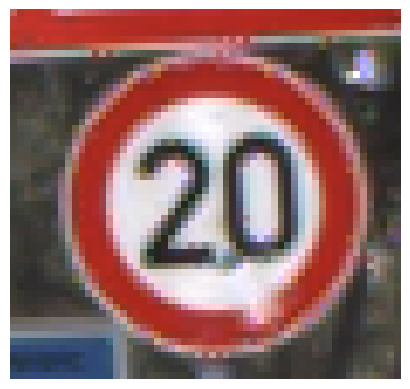

In [2]:
def read_and_display_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # OpenCV reads images in BGR format, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb


image_path = "./dataset/GTSRB/training/original/00000/00000_00020.ppm"
sign_image = read_and_display_images(image_path)

## Resizing the image so is compatible with all the transform

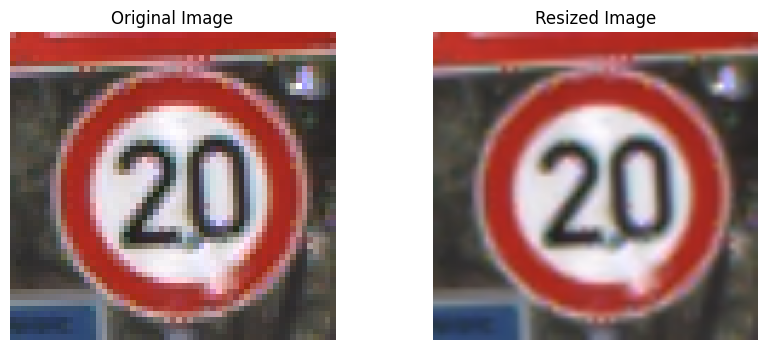

In [3]:
# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
transform_image = A.Compose([
    A.SmallestMaxSize(p=1.0, max_size=128, interpolation=1)
])
transformed = transform_image(image=original_image)

# Display all transformed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title(f"Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(transformed['image'])
plt.title(f"Resized Image")
plt.axis('off')

plt.show()

Saving the resized image for future work

In [5]:
resized_image = transformed['image']

# Rain filter

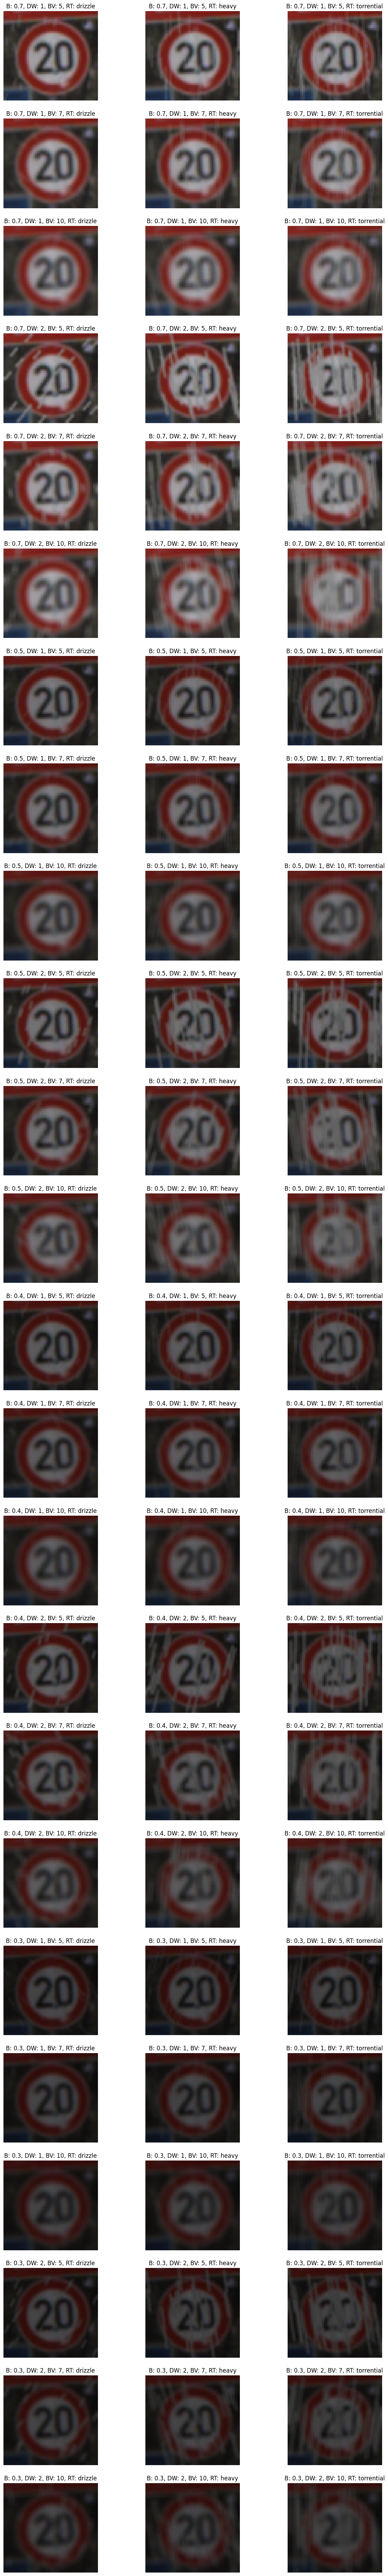

In [9]:
# List to store transformed images
transformed_images = []

# List of parameters
brightness_coefficients = [0.7, 0.5, 0.4, 0.3]
drop_width_values = [1, 2]
blur_values = [5, 7, 10]
rain_types = ['drizzle', 'heavy', 'torrential']

# Original image
original_image = resized_image

# Apply transformations for each combination of parameters
for brightness_coefficient in brightness_coefficients:
    for drop_width in drop_width_values:
        for blur_value in blur_values:
            for rain_type in rain_types:
                transform_image = A.Compose([
                    A.RandomRain(brightness_coefficient=brightness_coefficient,
                                 drop_width=drop_width, blur_value=blur_value,
                                 p=1, rain_type=rain_type),
                    A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]),
                                      interpolation=1)
                ])
                transformed = transform_image(image=original_image)
                transformed_images.append(
                    (transformed['image'], brightness_coefficient, drop_width, blur_value, rain_type))

# Display all transformed images
plt.figure(figsize=(15, 4 * len(drop_width_values) * len(blur_values) * len(brightness_coefficients)))
num_images = len(transformed_images)
rows = num_images // 3 + (1 if num_images % 4 > 0 else 0)
for i, (image, brightness, drop_width, blur, rain_type) in enumerate(transformed_images):
    plt.subplot(rows, 3, i + 1)
    plt.imshow(image)
    plt.title(f"B: {brightness}, DW: {drop_width}, BV: {blur}, RT: {rain_type}")
    plt.axis('off')

plt.show()

# Spatter

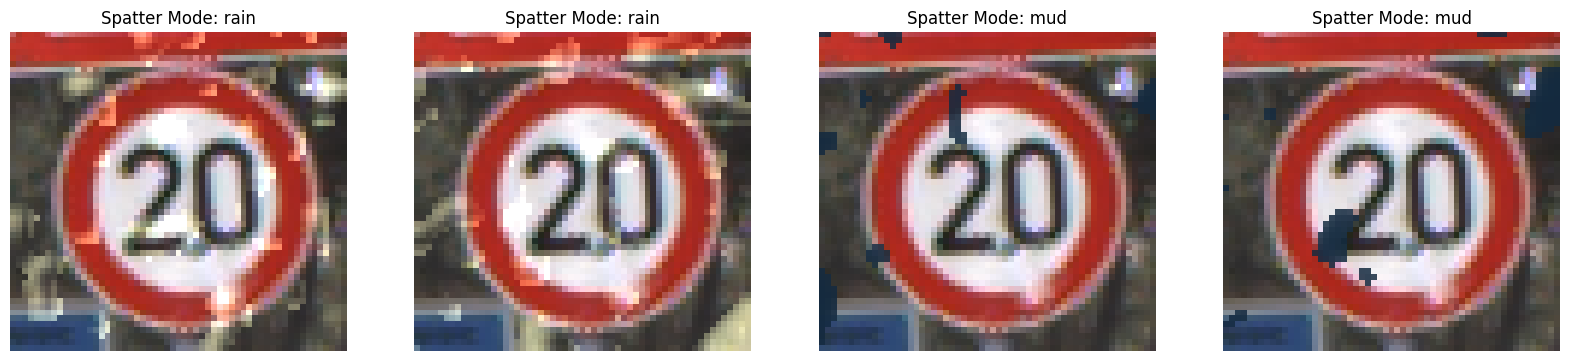

In [20]:
# List to store transformed images
transformed_images = []

# List of parameters
spatter_modes = ['rain', 'rain', 'mud', 'mud']

# Original image
original_image = sign_image

for spatter_mode in spatter_modes:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.Spatter(p=1.0, mode=spatter_mode)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], spatter_mode))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, spatter_mode) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Spatter Mode: {spatter_mode}")
    plt.axis('off')

plt.show()

## ZoomBlur

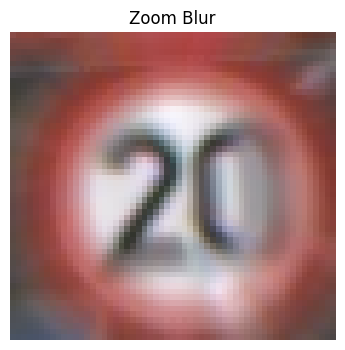

In [7]:
# List to store transformed images
transformed_images = []

# List of parameters

# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
transform_image = A.Compose([
    A.ZoomBlur(p=1.0, max_factor=(1.4, 2), step_factor=(0.03, 0.03))
])
transformed = transform_image(image=original_image)
transformed_images.append((transformed['image']))

# Display all transformed images
plt.figure(figsize=(10, 4))
num_images = len(transformed_images)
for i, (image) in enumerate(transformed_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(image)
    plt.title(f"Zoom Blur")
    plt.axis('off')

plt.show()

## RandomSunFlare

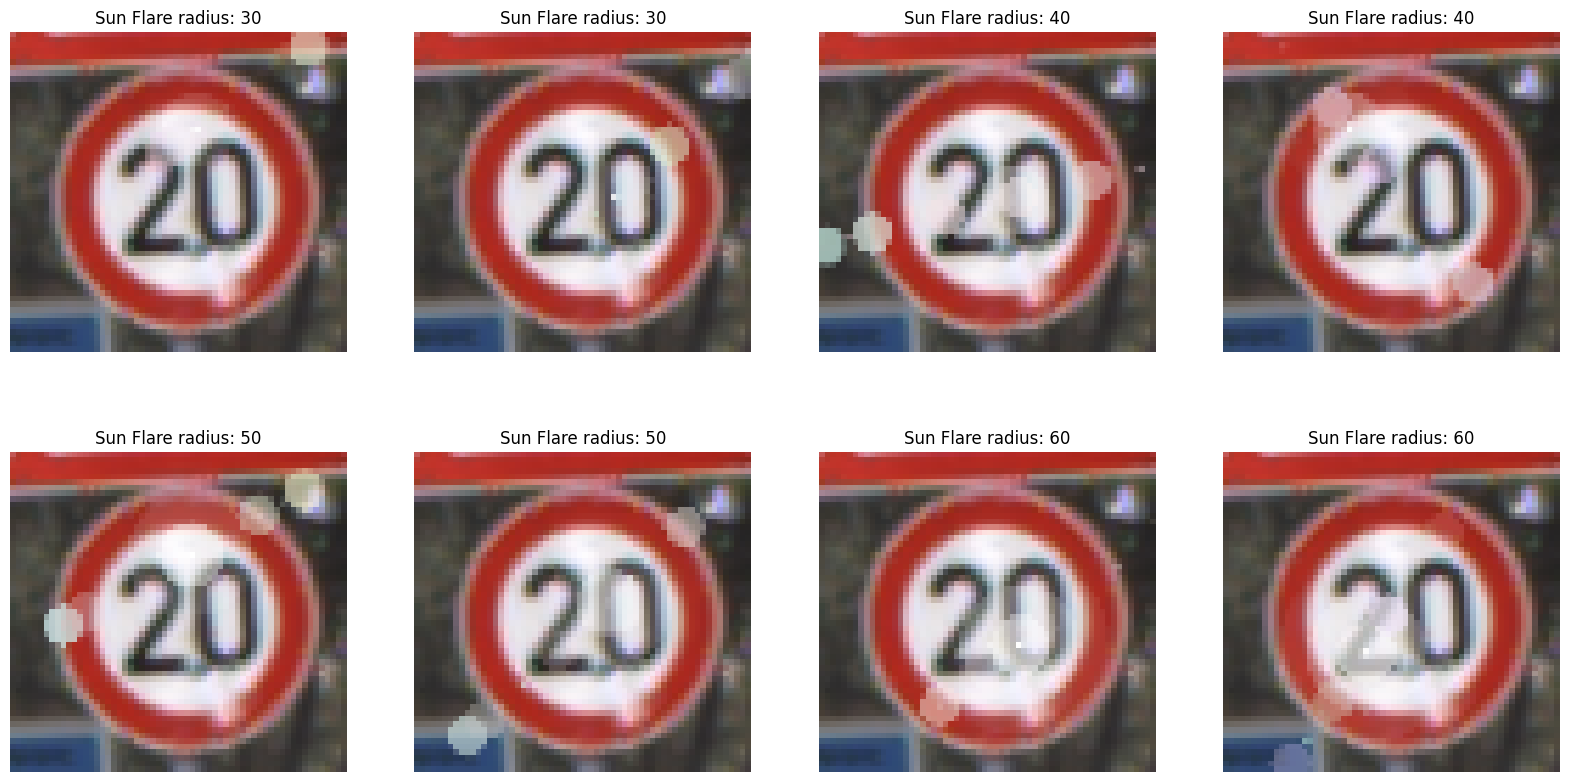

In [17]:
# List to store transformed images
transformed_images = []

# List of parameters
srcs_radius = [30, 30, 40, 40, 50, 50, 60, 60]

# Original image
original_image = resized_image

for src_radius in srcs_radius:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.RandomSunFlare(p=1.0, flare_roi=(0.3, 0.3, 0.7, 0.7), angle_lower=0, angle_upper=1, num_flare_circles_lower=6,
                         num_flare_circles_upper=10, src_radius=src_radius, src_color=(255, 255, 255)),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], src_radius))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, spatter_mode) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Sun Flare radius: {spatter_mode}")
    plt.axis('off')

plt.show()

## Ringing Overshoot (out of focus effect)

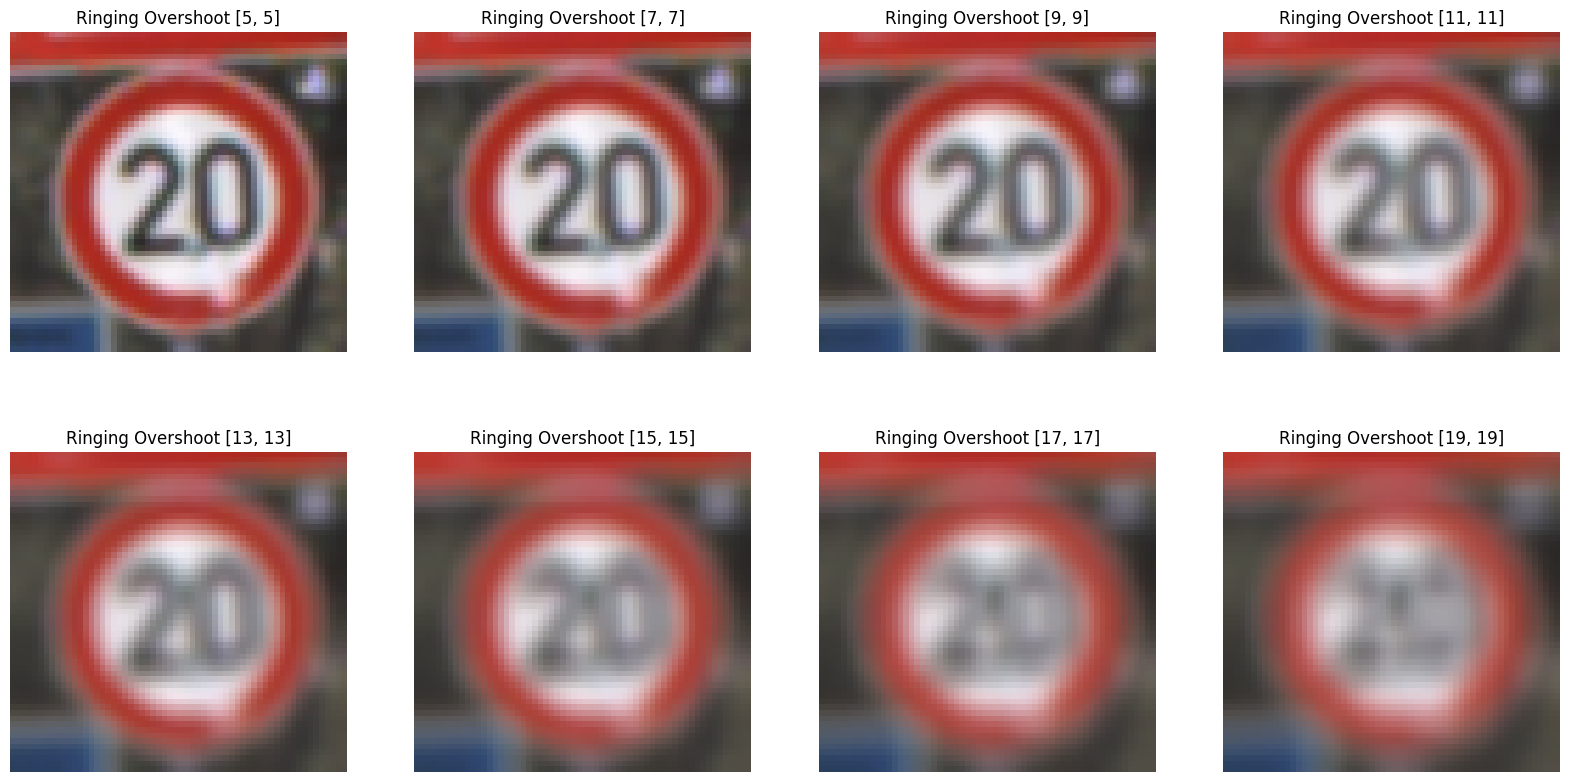

In [9]:
# List to store transformed images
transformed_images = []

# List of parameters
blur_limits = [[5, 5], [7, 7], [9, 9], [11, 11], [13, 13], [15, 15], [17, 17], [19, 19]]

# Original image
original_image = resized_image

# for src_radius in srcs_radius:
# Apply transformations for each combination of parameters
for blur_limit in blur_limits:
    transform_image = A.Compose([
        A.RingingOvershoot(p=1.0, blur_limit=blur_limit, cutoff=(0.1, 0.2)),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], blur_limit))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, bl) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Ringing Overshoot {bl}")
    plt.axis('off')

plt.show()

## Perspective

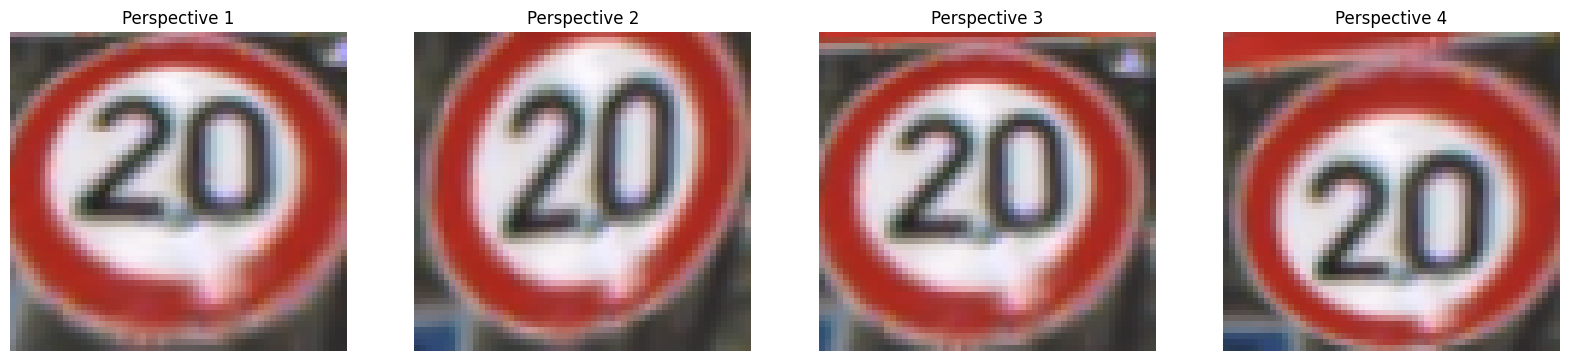

In [10]:
# List to store transformed images
transformed_images = []

# List of parameters
iterations = [1, 2, 3, 4]

# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
for i in iterations:
    transform_image = A.Compose([
        A.Perspective(p=1.0, scale=(0.15, 0.2), keep_size=True, pad_mode=1, mask_pad_val=0, fit_output=False,
                      interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], i))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, itr) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Perspective {itr}")
    plt.axis('off')

plt.show()

## Motion Blur

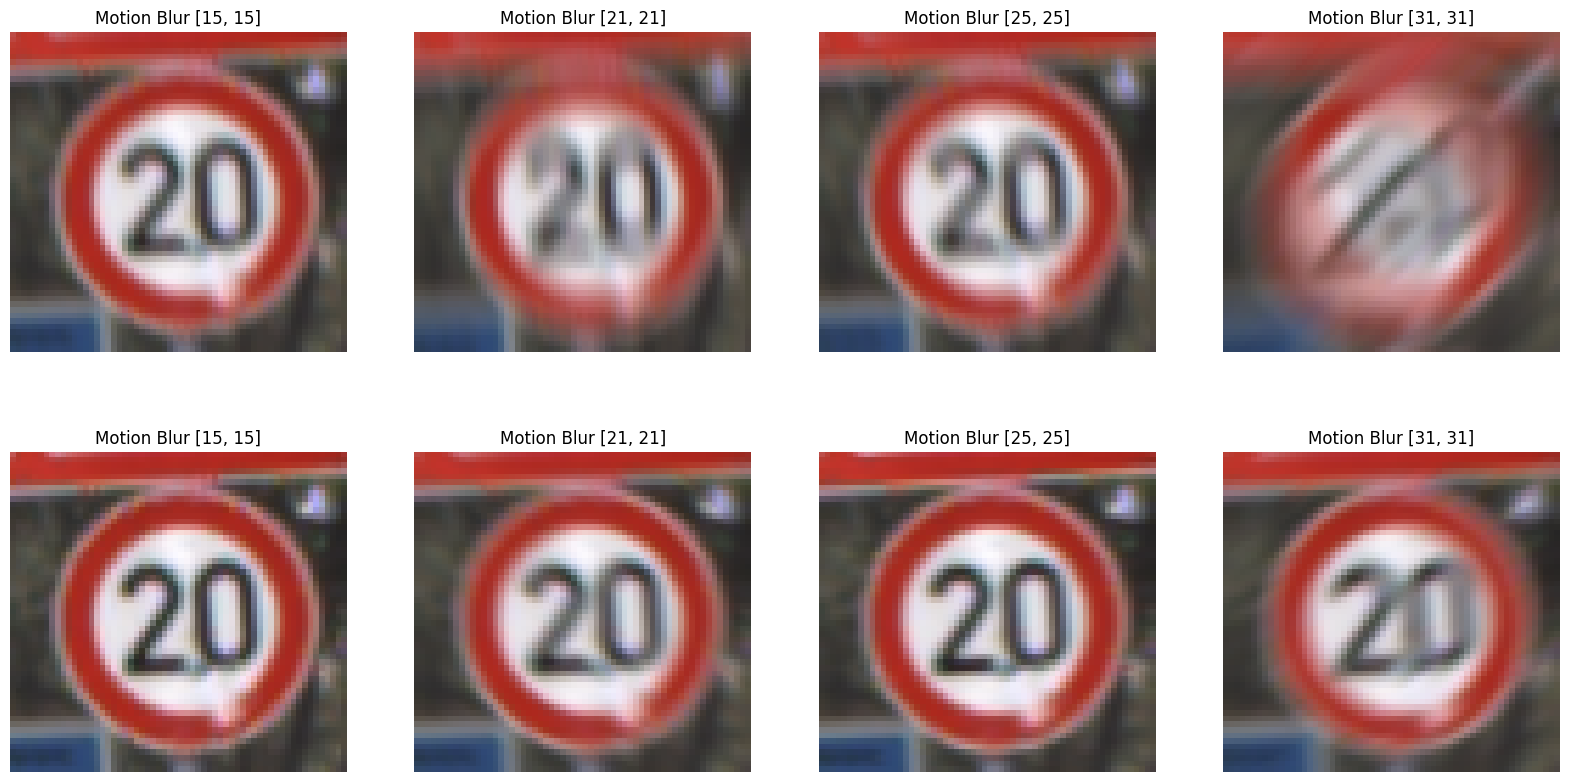

In [18]:
# List to store transformed images
transformed_images = []

# List of parameters
blur_limits = [15, 21, 25, 31, 15, 21, 25, 31]

# Original image
original_image = resized_image

# for src_radius in srcs_radius:
# Apply transformations for each combination of parameters
for blur_limit in blur_limits:
    transform_image = A.Compose([
        A.MotionBlur(p=1, blur_limit=(blur_limit, blur_limit), allow_shifted=False),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], blur_limit))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, bl) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Motion Blur {bl}")
    plt.axis('off')

plt.show()

# Fog

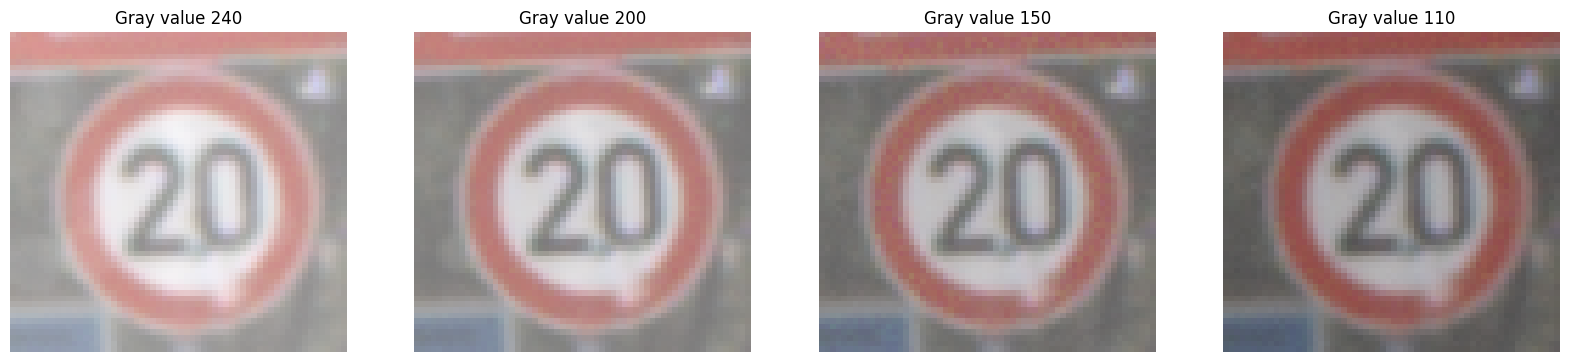

In [12]:
# List of grays intensity
gray_values = [240, 200, 150, 110]

# List to store transformed images
transformed_images = []

# Original image
original_image = resized_image

for gray_value in gray_values:
    # Apply transformations for each combination of parameters
    gray_image = np.full((np.shape(original_image)[0], np.shape(original_image)[1], 3), gray_value, dtype=np.uint8)
    transform_image = A.Compose([
        A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.6, alpha_coef=0.2, p=1),
        A.GaussianBlur(blur_limits=(2, 15), p=1),
        A.TemplateTransform(p=1, templates=gray_image),
        A.ISONoise(intensity=(0.2, 0.5), p=1),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], gray_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, gv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Gray value {gv}")
    plt.axis('off')

plt.show()

## Noise

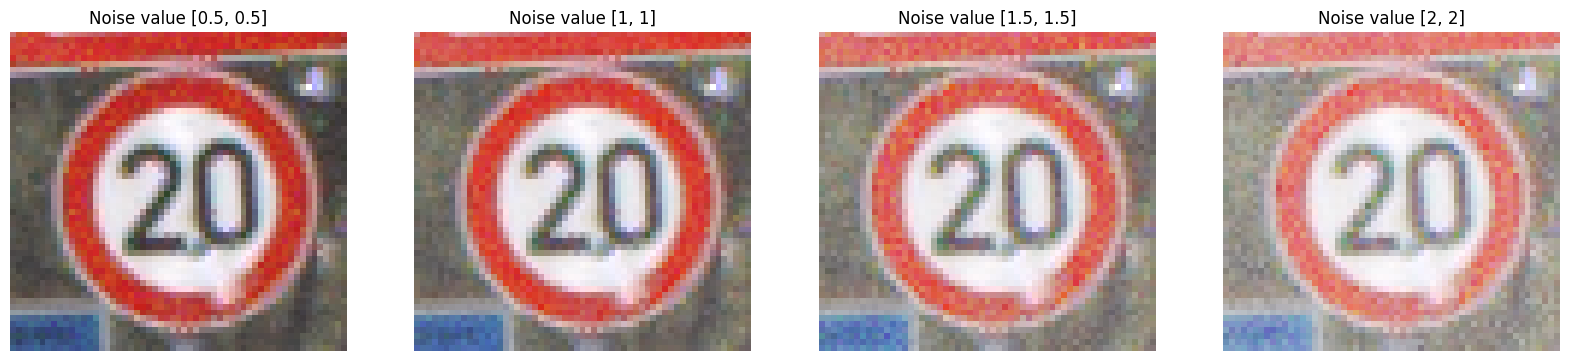

In [13]:
# List of grays intensity
noise_values = [0.5, 1, 1.5, 2]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for noise_value in noise_values:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.ISONoise(intensity=(noise_value, noise_value), p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], noise_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, nv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Noise value {nv}")
    plt.axis('off')

plt.show()

## Random Gamma

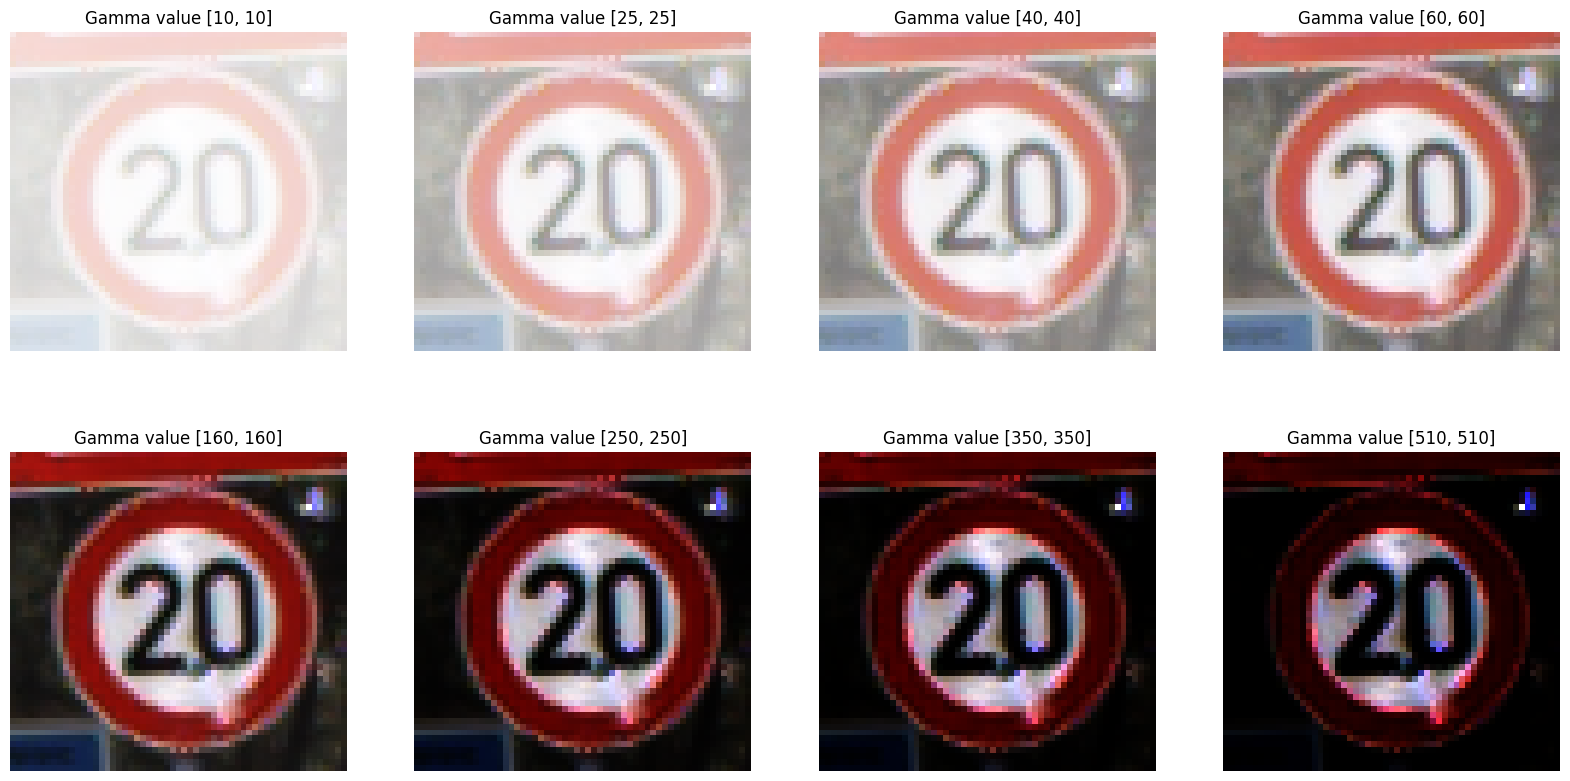

In [14]:
# List of grays intensity
gamma_values = [10, 25, 40, 60, 160, 250, 350, 510]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for gamma_value in gamma_values:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.RandomGamma(gamma_limit=(gamma_value, gamma_value), p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], gamma_value))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, gv) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Gamma value {gv}")
    plt.axis('off')

plt.show()

## Shadow

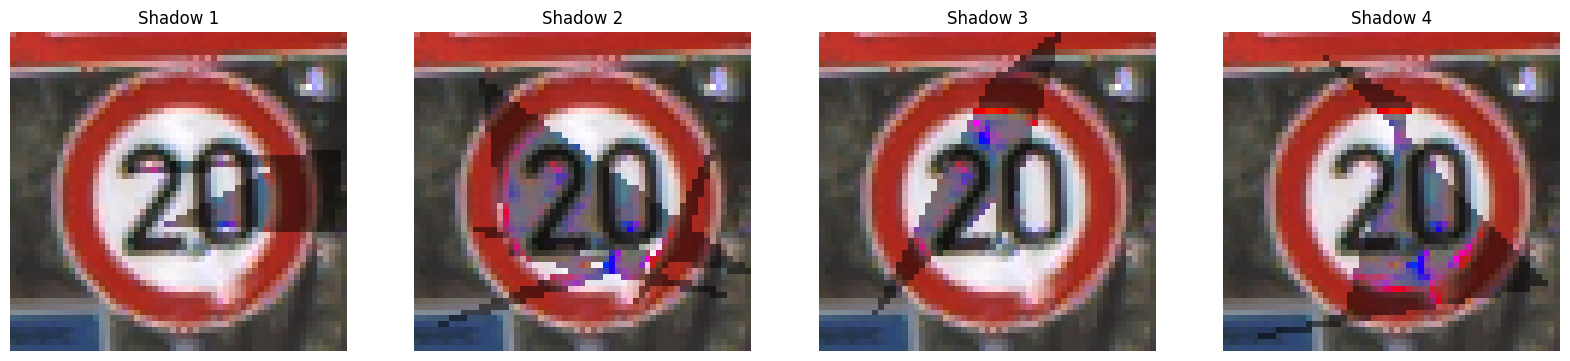

In [15]:
# List of grays intensity
noise_values = [1,2,3,4]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for noise_value in noise_values:
    transform_image = A.Compose([
        A.RandomShadow(shadow_roi=(0, 0, 1, 1), num_shadows_limit=(1, 2), num_shadows_lower=None,
                       num_shadows_upper=None, shadow_dimension=5, always_apply=False, p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], noise_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, nv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Shadow {nv}")
    plt.axis('off')

plt.show()

In [22]:
for i in range(4):
    print(i)

0
1
2
3
